In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Image

In [2]:
import numpy as np
import scipy as sp
from scipy import integrate
from scipy import interpolate
from scipy.interpolate import interp1d, UnivariateSpline,splrep
from scipy.integrate import quad, dblquad
from scipy.special import j0
from scipy.misc import derivative
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import datetime
#import fitsio

### >>> This cell is different, I use H0 = 67, Ross uses 100

In [3]:
def H(a):
    H0=100
    om=0.3089
    ol=1.-om
    result=H0*((om/(1.*a**3))+ol)**0.5
    return result

a = 1.0 / (1.0 + 2.0)
H(a)

300.5228776649126

In [4]:
def chi(z):
    athen=1/(1+z)
    c=3.*10**5
    chiint=integrate.quad(lambda a: 1/((a**2)*H(a)), athen, 1)
    result=c*chiint[0]
    return result

chi(2.0)

3601.096289906997

### >>> Agree with Ross again with little h definition

In [5]:
zs201=np.arange(201)*0.01
chiarray=np.zeros(201)
for i in range(0,201):
    chiarray[i]=chi(zs201[i])

zchiinterp=sp.interpolate.InterpolatedUnivariateSpline(chiarray,zs201,k=5)

h=0.6774
def zchi(chi):
    result=zchiinterp(chi)
    return result

#check with ned wright site
print(zchi(100))
print(zchi(1000))
print(zchi(1317))  #my chis are true chi*h....so this is 1945 real mpc
print(zchi(1945))  #this is 2871 real mpc
print(zchi(2871))

0.03359654087434861
0.36557790249865
0.4991677132128007
0.800533726130937
1.3746073586234788


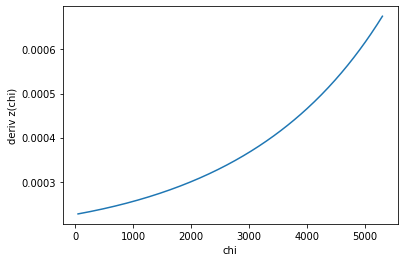

In [8]:
derivarray=np.zeros(201)
for j in range(0,201):
    derivarray[j]=derivative(zchi,chiarray[j])

#print (chiarray)
#print (derivarray)
plt.plot(chiarray[1:200]/h,derivarray[1:200]*h)
plt.xlabel('chi')
plt.ylabel('deriv z(chi)')
plt.show()

### We agree up to this point. 